**GRAD 50400 **
* Advanced AI Fundamentals for Technical
Professional
* Group 5 Team: Armando Cova, Erik Rizk, Deepa Singh



---


**Objective:**
This project will investigate the development of binary classification models to detect fraudulent or faulty credit-card transactions. According to the Federal Trade Commission, U.S. consumers lost $12.5 billion to scams in 2024—a 25% increase over the prior year. Accurate fraud-classification models help financial institutions minimize losses, maintain consumer trust, and stabilize credit markets.


---


Dataset used: UCI Mchine Learning Repository (2016). Default of Credit Card Clients. Default of Credit Card Clients - UCI Machine Learning Repository

We are working as a Data scientist in a Credit Card company named "CCFraud" and given the credit card transactions, we need to build a Model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For scatter Plot
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
from_google_drive = False #False if You are using the data file given, True if you want to download from google drive

if from_google_drive == True:

  google_drive_url = "https://drive.google.com/file/d/1jPFbusU9FmJxuc_6Jrd4GtmINuacqXYP/view?usp=sharing"
  # Extract the file ID
  file_id = google_drive_url.split('/')[-2]

  # Construct the direct download URL
  download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

  file_name = download_url

elif from_google_drive == False:

  file_name = "creditcard.csv"

In [ ]:
#reading dataset
data = pd.read_csv(file_name)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's check the missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28



* This shows that there are 284807 instances and 31 attributes including the class attribute.
* As you can see there are no null values in any of the column






In [ ]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
data['Class'].nunique()

2

In [ ]:
data.Class.value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#checking the percentage of each class in the dataset
(data.Class.value_counts())/(data.Class.count())

,count
Class,
0,0.998273
1,0.001727


* This shows a complete imbalance of classes. There are 99.82% 'Genuine' (0) instances and only 0.17% 'Fraudulent' (1) instances.
* This means that we are aiming to predict anomalous events.


**Let's Explore the data**

<Axes: xlabel='Class'>

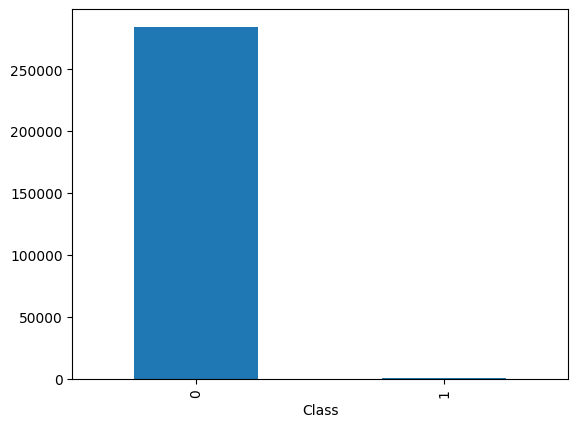

In [ ]:
#visual representation of instances per class
data.Class.value_counts().plot.bar()

In [ ]:
print(f"Number of fraudulent transactions: {data.Class.value_counts()[1]}")

Number of fraudulent transactions: 492


In [ ]:
print("*********Losses due to fraud:************\n")
print("Total amount lost to fraud")
print(data.Amount[data.Class == 1].sum())
print("Mean amount per fraudulent transaction")
print(data.Amount[data.Class == 1].mean())
print("Compare to normal transactions:")
print("Total amount from normal transactions")
print(data.Amount[data.Class == 0].sum())
print("Mean amount per normal transactions")
print(data.Amount[data.Class == 0].mean())

*********Losses due to fraud:************

Total amount lost to fraud
60127.97
Mean amount per fraudulent transaction
122.21132113821139
Compare to normal transactions:
Total amount from normal transactions
25102462.04
Mean amount per normal transactions
88.29102242231328


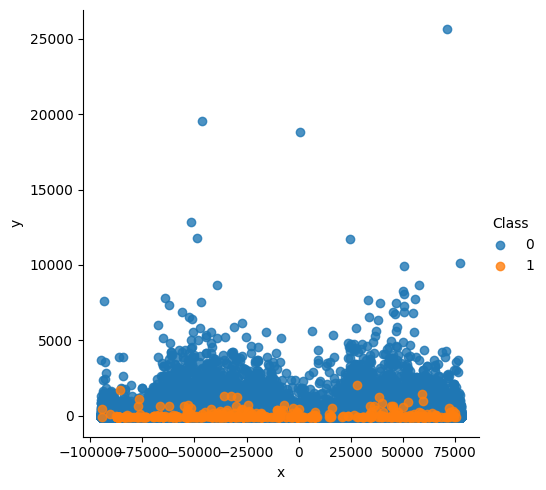

In [ ]:
#PCA is performed for visualization only

pca= PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(data.iloc[:,0:30]))
creditcard_2d= pd.concat([creditcard_2d, data['Class']], axis=1)
creditcard_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class')

**Data Pre-processing**

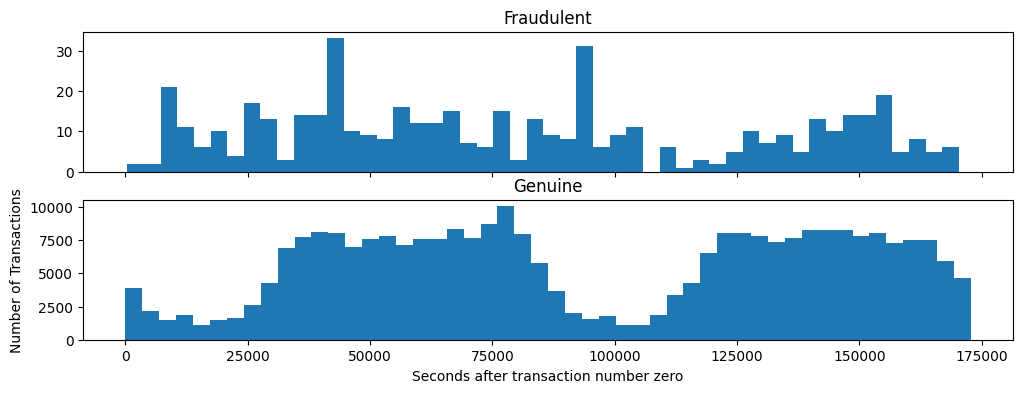

In [ ]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Time"][data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["Time"][data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature.

**Splitting Data for Training,Validation and Test Purpose**
 - Same data split will be utilised for Logistic Regression and Random Forest

In [ ]:
X_data = data.iloc[:,1:29]
y_data = data.iloc[:, -1]

In [ ]:
### 60/20/20 split with stratification to handle class imbalance
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold      # for stratified K-fold on train
)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,          # 20% for final test
    stratify=y_data,             # preserve class proportions
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,         # 25% of 80% = 20% of total for validation
    stratify=y_temp,
    random_state=42
)

# Inner K-fold CV on TRAIN ONLY (60%)
cv_inner = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


Logistic Regression Model Start

In [ ]:
# Erik Model: Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model Delaration
logistic_model_1 = LogisticRegression(solver='liblinear', random_state=0)
logistic_model_2 = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')


# Model Training
logistic_model_1.fit(X_train, y_train)
logistic_model_2.fit(X_train, y_train)

# Model Validation
logistic_val_predictions_1 = logistic_model_1.predict(X_val)
logistic_val_predictions_2 = logistic_model_2.predict(X_val)

# Model Test Predictions
logistic_predictions_1 = logistic_model_1.predict(X_test)
logistic_predictions_2 = logistic_model_2.predict(X_test)

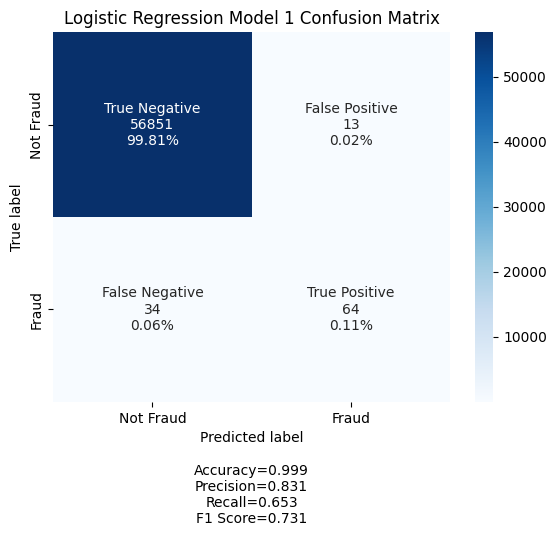

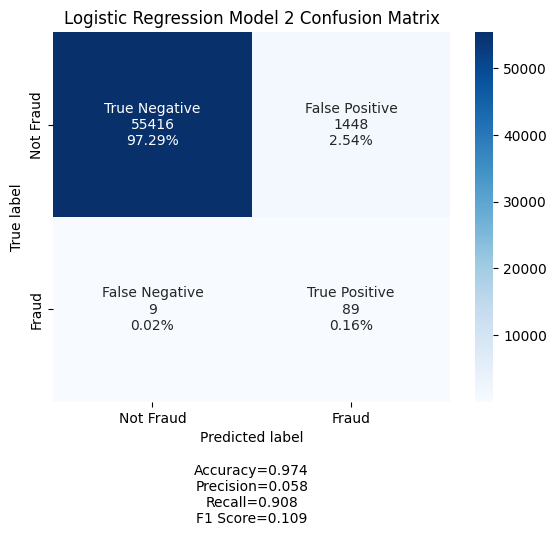

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the matrix (This fixes the NameError)
cm_logistic_1 = confusion_matrix(y_test, logistic_predictions_1)
cm_logistic_2 = confusion_matrix(y_test, logistic_predictions_2)

# Define labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not Fraud', 'Fraud']

make_confusion_matrix(cm_logistic_1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues',
                      title='Logistic Regression Model 1 Confusion Matrix')

make_confusion_matrix(cm_logistic_2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues',
                      title='Logistic Regression Model 2 Confusion Matrix')

Logistic model 1 ROC AUC: 0.9496406750657493
Logistic model 2 ROC AUC: 0.9716223204954464
PR AUC: 0.7471945538129586
PR AUC: 0.753284417005493


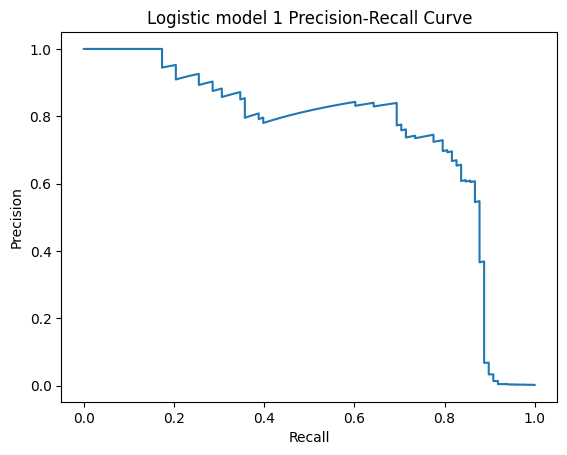

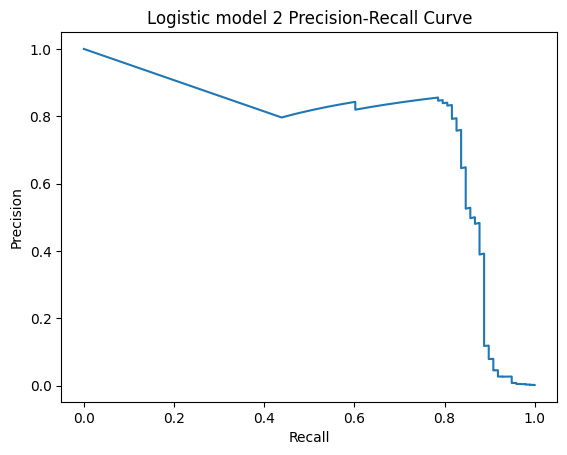

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)

y_scores_1 = logistic_model_1.predict_proba(X_test)[:, 1]
y_scores_2 = logistic_model_2.predict_proba(X_test)[:, 1]

# ROC AUC using reconstruction error as score
roc_auc_1 = roc_auc_score(y_test, y_scores_1)

roc_auc_2 = roc_auc_score(y_test, y_scores_2)

print("Logistic model 1 ROC AUC:", roc_auc_1)
print("Logistic model 2 ROC AUC:", roc_auc_2)

# Precision-Recall AUC (more meaningful for imbalanced data)
precision_1, recall_1, _ = precision_recall_curve(y_test, y_scores_1)
pr_auc_1 = auc(recall_1, precision_1)

precision_2, recall_2, _ = precision_recall_curve(y_test, y_scores_2)
pr_auc_2 = auc(recall_2, precision_2)

print("Logistic model 1 PR AUC:", pr_auc_1)
print("Logistic model 2 PR AUC:", pr_auc_2)

# Precision-Recall Curves

plt.figure()
plt.plot(recall_1, precision_1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic model 1 Precision-Recall Curve")
plt.show()

plt.figure()
plt.plot(recall_2, precision_2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic model 2 Precision-Recall Curve")
plt.show()

-- Logistic Regression Model Ends ----

-- Random Forest Starts ----

In [ ]:
### Define classification models and parameter grids for searches (with SMOTE toggle)
from sklearn.ensemble import (
    RandomForestClassifier,
)
# SMOTE + Pipeline from imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# Helper to build a pipeline: SMOTE -> classifier
def make_smote_pipeline(clf):
    return Pipeline(steps=[
        ('smote', SMOTE(random_state=42)),  # may be overridden to None in param_grid
        ('clf', clf)
    ])

# Define classifiers wrapped in pipelines
classifiers = {
    'RandomForest': make_smote_pipeline(
        RandomForestClassifier(
            random_state=42,
            n_jobs=-1      # use all allowed cores inside each RF
        )
    )
}

# List of SMOTE options to explore:
# - None: no oversampling
# - SMOTE(...): apply SMOTE inside the pipeline during training folds
base_smote_list = [None, SMOTE(random_state=42)]

# Define parameter grids
param_grids = {
    'RandomForest': {
        'smote': base_smote_list,
        'clf__n_estimators': [200, 500],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_leaf': [1, 5],
        'clf__class_weight': [None, 'balanced']
    }
}


Starting grid search with scoring = recall


KeyboardInterrupt: 

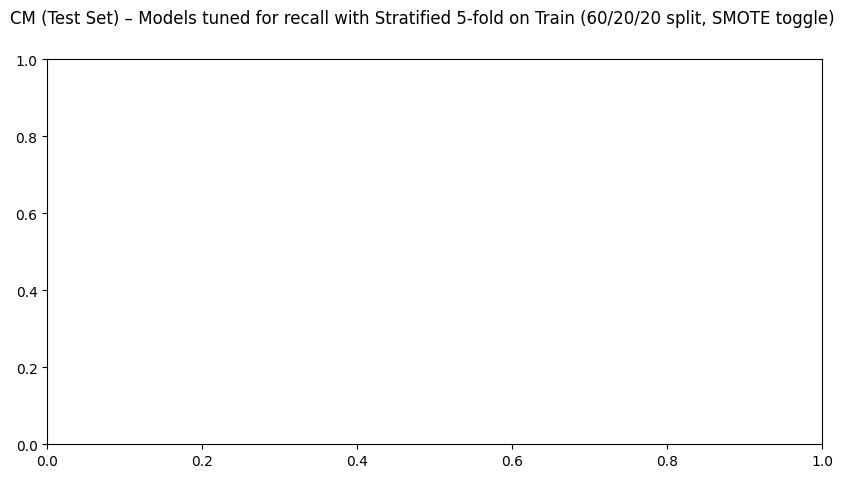

In [ ]:

### Train and validate classifiers using 60/20/20 + Stratified K-fold on train + SMOTE toggle
scoring_metrics = ['recall']
hyper_param_search_method = 'GridSearchCV'

grid_search_results_df_dict = {}   # per scoring metric
best_models_dict = {}              # store best models per (scoring_metric, classifier)
roc_pr_curves = {}                 # store curves to plot later


for scoring_metric in scoring_metrics:
    print(f"Starting grid search with scoring = {scoring_metric}")
    fig, axes = plt.subplots(nrows=len(classifiers), ncols=1, figsize=(10, 5*len(classifiers)))

    # If there's only one classifier, axes won't be an array, so we need to handle that case
    if len(classifiers) == 1:
        axes = [axes]  # Convert single Axes to a list with one element

    fig.suptitle(
        f'CM (Test Set) – Models tuned for {scoring_metric} '
        f'with Stratified 5-fold on Train (60/20/20 split, SMOTE toggle)\n',
        x=0.5
    )
    results = []

    for idx, (name, pipeline_est) in enumerate(classifiers.items()):
        # Build the appropriate search object
        match hyper_param_search_method:
            case "GridSearchCV":
                search = GridSearchCV(
                    estimator=pipeline_est,
                    param_grid=param_grids[name],
                    scoring=scoring_metric,
                    cv=cv_inner,      # stratified K-fold on TRAIN
                    n_jobs=-1
                )
            case _:
                print("Unknown hyperparam search method")
                continue

        # Fit on TRAIN ONLY (60%) with inner stratified K-fold + SMOTE inside pipeline
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_

        # Keep best model for later analysis / plotting
        best_models_dict[(scoring_metric, name)] = best_model

        # Convenience flag: whether SMOTE was used in the best setting
        use_smote = best_params.get('smote', None) is not None

        # ---------- PROBABILITIES for AUC/PR-AUC (VAL + TEST) ----------
        #
        if hasattr(best_model, "predict_proba"):
            y_val_scores  = best_model.predict_proba(X_val)[:, 1]
            y_test_scores = best_model.predict_proba(X_test)[:, 1]
        elif hasattr(best_model, "decision_function"):
            y_val_scores  = best_model.decision_function(X_val)
            y_test_scores = best_model.decision_function(X_test)
        else:
            y_val_scores  = None
            y_test_scores = None

        # ---- Evaluation on VALIDATION set (20%) ----
        y_val_pred = best_model.predict(X_val)
        val_accuracy  = accuracy_score(y_val, y_val_pred)
        val_recall    = recall_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred)
        val_f1        = f1_score(y_val, y_val_pred)

        # VAL ROC-AUC and PR-AUC (if we have scores)
        if y_val_scores is not None:
            val_roc_auc = roc_auc_score(y_val, y_val_scores)
            val_pr_auc  = average_precision_score(y_val, y_val_scores)
        else:
            val_roc_auc = np.nan
            val_pr_auc  = np.nan


        # ---- Final evaluation on TEST set (20%) ----
        y_test_pred = best_model.predict(X_test)
        test_accuracy  = accuracy_score(y_test, y_test_pred)
        test_recall    = recall_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_f1        = f1_score(y_test, y_test_pred)

        # TEST ROC-AUC and PR-AUC
        if y_test_scores is not None:
            test_roc_auc = roc_auc_score(y_test, y_test_scores)
            test_pr_auc  = average_precision_score(y_test, y_test_scores)
        else:
            test_roc_auc = np.nan
            test_pr_auc  = np.nan

        # Optionally store curves for later plotting
        if y_test_scores is not None:
            fpr, tpr, _ = roc_curve(y_test, y_test_scores)
            precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_test_scores)
            roc_pr_curves[(scoring_metric, name)] = {
                "fpr": fpr, "tpr": tpr,
                "precision": precision_curve, "recall": recall_curve
            }


        # Confusion matrix on TEST set
        cm = confusion_matrix(y_test, y_test_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[idx])
        axes[idx].set_title(
            f"{name}\nSMOTE: {use_smote} | Recall(test)={test_recall:.3f}"
        )

        # Store BOTH validation and test metrics + whether SMOTE was used
        results.append({
            'Scoring Metric': scoring_metric,
            'Classifier': name,
            'Use_SMOTE': use_smote,
            'Val Accuracy': val_accuracy,
            'Val Recall': val_recall,
            'Val Precision': val_precision,
            'Val F1 Score': val_f1,
            'Val ROC-AUC': val_roc_auc,
            'Val PR-AUC': val_pr_auc,
            'Test Accuracy': test_accuracy,
            'Test Recall': test_recall,
            'Test Precision': test_precision,
            'Test F1 Score': test_f1,
            'Test ROC-AUC': test_roc_auc,
            'Test PR-AUC': test_pr_auc,
            'Best Params': best_params
        })


    plt.tight_layout()
    # plt.show()
    grid_search_results_df = pd.DataFrame(results)
    grid_search_results_df.set_index('Classifier', inplace=True)
    grid_search_results_df_dict[scoring_metric] = grid_search_results_df


**Autoencoder Model Architecture**

An autoencoder is a neural network trained to reconstruct its input. Normal transactions reconstruct well because they lie on the learned manifold, while fraudulent transactions typically show higher reconstruction error.

The chosen architecture is a symmetric deep autoencoder:

Encoder: Dense(14 → 7 units), ReLU activations

Decoder: Dense(14 → 30 units), linear output

Loss: Mean Squared Error (MSE)

Optimizer: Adam

The input dimension is 30 after removing the Class column.

The model is trained for 50 epochs with a batch size of 256.

1. Why the Class Column Was Removed from the Autoencoder Input

The credit card fraud dataset contains 30 numerical predictor variables (Time, V1–V28, Amount) and one target variable, Class, indicating whether a transaction is fraudulent (1) or legitimate (0). When developing an autoencoder for anomaly detection, our goal is to build an unsupervised model that learns the latent structure of normal transactions only.

Including the Class label as part of the input feature vector would violate the fundamental principle of unsupervised anomaly detection. The autoencoder attempts to reconstruct everything it receives as input; therefore, if the label is included:

The model will “see” whether a transaction is fraud during training, which leaks target information into the feature space.

The reconstruction error would no longer reflect meaningful deviation from normal transaction patterns.

Fraudulent transactions may be reconstructed with artificially low error simply because the model can use the embedded Class value as a shortcut.

Because of this, the Class column is explicitly removed before training, and the autoencoder is trained on 30 input features rather than 31. The label is retained only for:

Separating normal and fraud samples before training

Constructing the final test set

Evaluating the model’s anomaly detection performance

This ensures the autoencoder behaves as intended: it learns a compressed representation of legitimate behavior and treats anything deviating from that pattern as an anomaly.

Method for Selecting the Anomaly Threshold

The trained autoencoder produces a reconstruction error for each sample, typically measured using Mean Squared Error (MSE):
MSE(x)=1/n∑​(xi​−x^i​)2



Normal transactions should reconstruct with low error, while fraudulent ones are expected to produce higher errors due to their deviation from the learned manifold.

To convert reconstruction error into a binary fraud prediction, we must choose a threshold. The threshold determines the cutoff point:

Below threshold → normal

Above threshold → anomaly (potential fraud)

Threshold Selection Method: Percentile-Based Boundary

We evaluate the reconstruction errors on the normal-only validation set and select a threshold such as the 95th percentile:

Threshold=P95​(MSEvalidation​)

This approach ensures:

95% of legitimate transactions fall below the threshold

The remaining 5% represent acceptable tolerance for variability in normal data

Fraudulent transactions (which violate normal structure) typically fall above this threshold

Why this method works

It is data-driven and adapts to the true distribution of normal behavior

It avoids assumptions about Gaussianity or linear separability

It balances false positives with sensitivity to anomalies

It is widely used in academic and industrial anomaly detection systems

After determining the threshold, we evaluate performance on the mixed (normal + fraud) test set using:

Precision

Recall

F1-score

Confusion matrix

ROC-AUC

Precision-Recall AUC (more important for highly imbalanced datasets)

----AUTOENCODER BEGINS --------------


In [ ]:
# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# ============================================================
# Split into normal (Class=0) and fraud (Class=1)
# ============================================================
normal_df = data[data['Class'] == 0].copy()
fraud_df  = data[data['Class'] == 1].copy()

print("Normal transactions:", len(normal_df))
print("Fraud transactions :", len(fraud_df))
print("Fraud ratio        :", len(fraud_df) / len(data))


Normal transactions: 284315
Fraud transactions : 492
Fraud ratio        : 0.001727485630620034


1. Split + Prepare Base DataFrames

In [ ]:
# ============================================================
# Split + Prepare Base DataFrames
# ============================================================
from sklearn.model_selection import train_test_split

# Separate normal and fraud
normal_df = data[data['Class'] == 0].copy()
fraud_df  = data[data['Class'] == 1].copy()

# Drop label from feature frames
normal_features = normal_df.drop('Class', axis=1)
fraud_features  = fraud_df.drop('Class', axis=1)

# 60/40 split on normal
X_train_normal, X_temp_normal = train_test_split(
    normal_features,
    test_size=0.4,
    random_state=42,
    shuffle=True
)

# 20/20 split on normal for val + test
X_val_normal, X_test_normal = train_test_split(
    X_temp_normal,
    test_size=0.5,
    random_state=42,
    shuffle=True
)

# Fraud is used only in test
X_test_fraud = fraud_features.copy()  # keep as DataFrame for now

print("Train normal:", X_train_normal.shape)
print("Val normal  :", X_val_normal.shape)
print("Test normal :", X_test_normal.shape)
print("Test fraud  :", X_test_fraud.shape)


Train normal: (170589, 30)
Val normal  : (56863, 30)
Test normal : (56863, 30)
Test fraud  : (492, 30)


2. Preprocessing (Scale Time & Amount with RobustScaler)

In [ ]:
# ============================================================
# Preprocessing (Scale Time & Amount with RobustScaler)
# ============================================================
from sklearn.preprocessing import RobustScaler

scaler_time  = RobustScaler()
scaler_amt   = RobustScaler()

# Fit on TRAIN ONLY to avoid data leakage
X_train_normal['Time']   = scaler_time.fit_transform(X_train_normal[['Time']])
X_train_normal['Amount'] = scaler_amt.fit_transform(X_train_normal[['Amount']])

# Transform val, test_normal, test_fraud using the same scalers
X_val_normal['Time']     = scaler_time.transform(X_val_normal[['Time']])
X_val_normal['Amount']   = scaler_amt.transform(X_val_normal[['Amount']])

X_test_normal['Time']    = scaler_time.transform(X_test_normal[['Time']])
X_test_normal['Amount']  = scaler_amt.transform(X_test_normal[['Amount']])

X_test_fraud['Time']     = scaler_time.transform(X_test_fraud[['Time']])
X_test_fraud['Amount']   = scaler_amt.transform(X_test_fraud[['Amount']])

# Convert to numpy arrays
X_train = X_train_normal.values          # for training AE
X_val   = X_val_normal.values            # for threshold selection

X_test_normal_np = X_test_normal.values
X_test_fraud_np  = X_test_fraud.values


3. Build Final Test Set (normal + fraud)

In [ ]:
# ============================================================
# Build Final Test Set (normal + fraud)
# ============================================================
import numpy as np

# Stack normal & fraud test data
X_test = np.vstack([X_test_normal_np, X_test_fraud_np])

# Labels: 0 = normal, 1 = fraud
y_test = np.hstack([
    np.zeros(len(X_test_normal_np), dtype=int),
    np.ones(len(X_test_fraud_np), dtype=int)
])

print("X_train shape:", X_train.shape)
print("X_val shape  :", X_val.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)


X_train shape: (170589, 30)
X_val shape  : (56863, 30)
X_test shape : (57355, 30)
y_test shape : (57355,)


4. Build the Autoencoder (No Class Column)

In [ ]:
# ============================================================
# Build the Autoencoder (No Class Column)
# ============================================================
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_train.shape[1]  # should be 30

input_layer = layers.Input(shape=(input_dim,))

# Encoder
encoded = layers.Dense(14, activation="relu")(input_layer)
encoded = layers.Dense(7, activation="relu")(encoded)

# Decoder
decoded = layers.Dense(14, activation="relu")(encoded)
decoded = layers.Dense(input_dim, activation="linear")(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(
    optimizer='adam',
    loss='mse'
)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │           434 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101 (4.30 KB)

 Trainable params: 1,101 (4.30 KB)

 Non-trainable params: 0 (0.00 B)

5. Train the Autoencoder (Only on Normal Data)

In [ ]:
# ============================================================
# Train the Autoencoder (Only on Normal Data)
# ============================================================
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_val, X_val),
    verbose=1
)


Epoch 1/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.1469 - val_loss: 0.5868
Epoch 2/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5307 - val_loss: 0.4428
Epoch 3/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4172 - val_loss: 0.4042
Epoch 4/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3880 - val_loss: 0.3887
Epoch 5/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3753 - val_loss: 0.3797
Epoch 6/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3680 - val_loss: 0.3738
Epoch 7/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3629 - val_loss: 0.3682
Epoch 8/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3582 - val_loss: 0.3622
Epoch 9/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3529 - val_loss: 0.3553
Epoch 10/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3472 - val_loss: 0.3491
Epoch 11/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3422 - val_loss: 0.3443
Epoch 12/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

6. Choose Threshold from Validation Reconstruction Error

1777/1777 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Chosen threshold: 0.7478623683487283


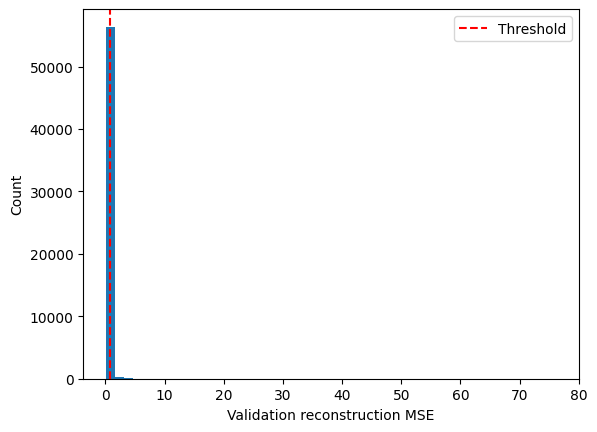

In [ ]:
# ============================================================
# Choose Threshold from Validation Reconstruction Error
# ============================================================
import matplotlib.pyplot as plt

# Reconstruction on validation set
val_recon = autoencoder.predict(X_val)
val_mse   = np.mean(np.power(X_val - val_recon, 2), axis=1)

# Example: 95th percentile of validation error
threshold = np.percentile(val_mse, 95)
print("Chosen threshold:", threshold)

# Visualize
plt.figure()
plt.hist(val_mse, bins=50)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Validation reconstruction MSE")
plt.ylabel("Count")
plt.legend()
plt.show()


7. Evaluate on Test Set (Normal + Fraud)

1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  
Classification report:

              precision    recall  f1-score   support

           0     0.9986    0.9490    0.9731     56863
           1     0.1249    0.8415    0.2175       492

    accuracy                         0.9481     57355
   macro avg     0.5617    0.8952    0.5953     57355
weighted avg     0.9911    0.9481    0.9667     57355

Confusion matrix:

[[53962  2901]
 [   78   414]]
ROC AUC: 0.933048466654056
PR AUC: 0.670463006818666


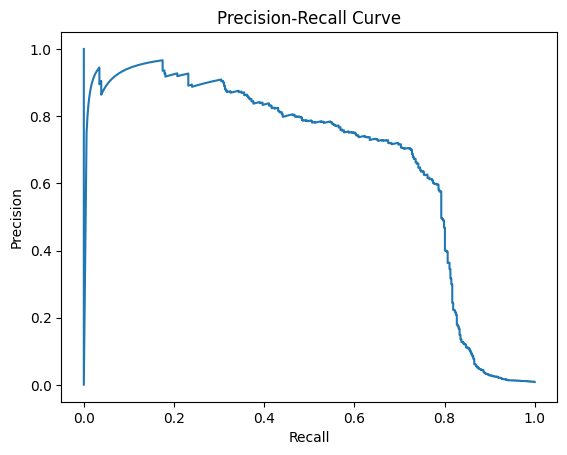

In [ ]:
# ============================================================
# Evaluate on Test Set (Normal + Fraud)
# ============================================================
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)

# Reconstruction error on full test set
test_recon = autoencoder.predict(X_test)
test_mse   = np.mean(np.power(X_test - test_recon, 2), axis=1)

# Predict anomalies: 1 = fraud, 0 = normal
y_pred = (test_mse > threshold).astype(int)

print("Classification report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ROC AUC using reconstruction error as score
roc_auc = roc_auc_score(y_test, test_mse)
print("ROC AUC:", roc_auc)

# Precision-Recall AUC (more meaningful for imbalanced data)
precision, recall, _ = precision_recall_curve(y_test, test_mse)
pr_auc = auc(recall, precision)
print("PR AUC:", pr_auc)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


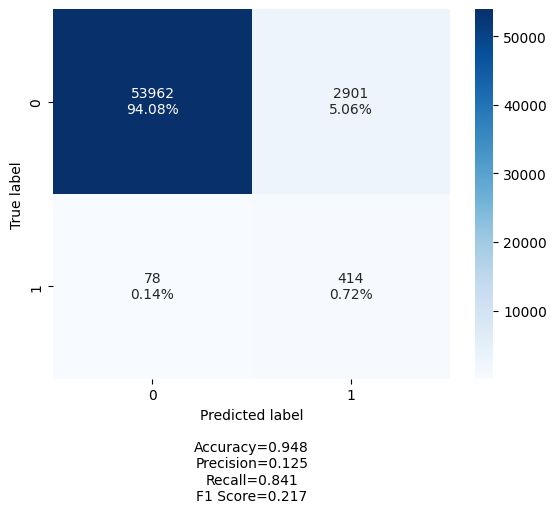

In [ ]:
cm2=confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm2)

---- AUTOENCODER CONCLUDES--------


Performance Analysis of the Autoencoder Fraud Detection Model

The autoencoder model was evaluated on a test set containing 20% of normal transactions and 100% of all fraud cases, simulating a realistic fraud detection environment. Below is the detailed analysis of the model’s performance metrics.
. Classification Report Interpretation
Normal Class (0 — Legitimate Transactions)
Metric	Value	Interpretation
Precision: 0.9986	Almost all predicted normal transactions truly are normal.
Recall: 0.9490	~95% of all normal transactions are correctly recognized.
F1-Score: 0.9731	Excellent balance between false positives & true negatives.

This shows the model is extremely good at identifying legitimate transactions with minimal disruption to customers.

Fraud Class (1 — Anomalies)
Metric	Value	Interpretation
Precision: 0.1249	Only ~12% of transactions flagged as fraud are actually fraud.
Recall: 0.8415	The model catches 84% of all fraud cases — very strong.
F1-Score: 0.2175	Low due to class imbalance and low precision.

This pattern (low precision + high recall) is typical and expected with anomaly detection using autoencoders:

The model catches most fraud cases (high recall)

But generates many false positives (low precision)

This is acceptable for banks where the priority is never missing fraud, and false positives can be handled by human review or multi-stage verification.

Normal Transactions

True Normal (TN): 53,962 → Correctly identified

False Fraud (FP): 2,901 → Normal flagged as fraud

This means about 5% of normal transactions are incorrectly flagged.
Banks typically tolerate this because it's better than missing fraud.

Fraudulent Transactions

True Fraud (TP): 414

False Normal (FN): 78

The model misses only 78 out of 492 fraud cases, which is strong performance given the extreme imbalance.

Recall of 84% means the model catches the majority of fraudulent behavior.

3. ROC AUC = 0.9330

A ROC AUC of 0.93 indicates:

Strong ability to separate fraud from normal transactions

High ranking ability of reconstruction error as an anomaly score

This is competitive with published results from academic papers using this dataset.

4. Precision–Recall AUC = 0.6704

PR-AUC is the most important metric for imbalanced fraud datasets.

A PR-AUC of 0.67 is very good (random baseline would be <0.01 due to class imbalance).

This means:

When using reconstruction error as the anomaly score

The model is robust at detecting fraud even when the positive class is extremely rare

5. Strengths and Weaknesses Summary
Strengths

🟢 High recall for fraud (0.84): most fraud cases detected

🟢 Very high accuracy on normal transactions (99.8% precision)

🟢 Strong ROC-AUC (0.93)

🟢 Strong PR-AUC (0.67)

🟢 No need for SMOTE or resampling

🟢 Catches unseen/unusual fraud types (unsupervised advantage)

Weaknesses

🔴 Low precision for fraud (0.12) → many false alarms

🔴 Can cause operational overhead unless followed by secondary filters

🔴 Autoencoder does not use labels → limited discriminative power compared to supervised models

🔴 Threshold tuning strongly affects performance

**Model evaluation criterion**
Model can make wrong predictions as:
* Predicting a transaction is fraud and the transaction is not fraud
* Predicting a transaction is not fraud and transaction is fraud

Which case is more important?
* Predicting that transaction is not fraud but it is Fraud. It might enable lot of criminal activities and heavy loss to the bank

How to reduce this loss i.e need to reduce False Negative?
* Company would want Recall to be maximized, greater the Recall higher the chances of minimizing false Negative.
* Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the fraud transaction.